In [54]:
import pandas as pd
import numpy as np
import os

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# acquire
from env import host, user, password
from pydataset import data
import acquire

In [55]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Data Acquisition 

1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
data = sns.load_dataset('iris')
df_iris = pd.DataFrame(data)

 - print the first 3 rows

In [ ]:
df_iris.head(3)

- print the number of rows and columns (shape)


In [ ]:
df_iris.shape

- print the column names


In [ ]:
df_iris.columns

In [ ]:
df_iris.columns.to_list()

- print the data type of each column

In [ ]:
df_iris.info()

In [ ]:
df_iris.dtypes

- print the summary statistics for each of the numeric variables.


In [ ]:
df_iris.describe()

In [ ]:
df_iris.describe().T

--  Would you recommend rescaling the data based on these statistics?
no

2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1LGlCFS71lxWgbLZKOGx232I7NDsveFFrHLGEDwinHQA/edit#gid=1922811804'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name='Table1_CustDetails')

- assign the first 100 rows to a new dataframe, df_excel_sample


In [ ]:
df_excel_sample = df_excel.head(100)

- print the number of rows of your original dataframe

In [ ]:
df_excel.shape[0]

In [ ]:
df_excel_sample.shape

- print the first 5 column names


In [ ]:
df_excel.columns[:5]

- print the column names that have a data type of object

In [ ]:
df_excel.info()

In [ ]:
df_excel.select_dtypes(include='object').columns # justin's

In [ ]:
df_excel.select_dtypes(include='object').columns.to_list()

In [ ]:
obj_lst = list(df_excel.columns) # alicia's

for obj in obj_lst:
    if df_excel[obj].dtype == 'object':
        print(obj)

In [ ]:
for obj in obj_lst:
    if df_excel[obj].dtype == 'float64':
        print(obj,"range:", df_excel[obj].max() - df_excel[obj].min())

3. Read the data from this google sheet into a dataframe, df_google



In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
df_google = pd.read_csv(csv_export_url)

- print the first 3 rows


In [ ]:
df_google.head(3)

- print the number of rows and columns


In [ ]:
df_google.shape

- print the column names


In [ ]:
df_google.columns

In [ ]:
df_google.info()

- print the summary statistics for each of the numeric variables


In [ ]:
df_google.describe(include=[np.number])

- print the unique values for each of your categorical variables


In [ ]:
df_google.PassengerId.unique()
df_google.Survived.unique()
df_google.Pclass.unique()
df_google.Name.unique()
df_google.Sex.unique()
df_google.Ticket.unique()
df_google.Cabin.unique()
df_google.Embarked.unique()


In [ ]:
new_titanic_data()

In [ ]:
get_titanic_data()

In [ ]:
iris = new_iris_data()

In [ ]:
get_iris_data()

# Data Prep

1. Use the function defined in acquire.py to load the iris data.

2. Drop the species_id and measurement_id columns.

3. Rename the species_name column to just species.

4. Create dummy variables of the species name.

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [5]:
import acquire

In [6]:
df = acquire.get_iris_data()

In [7]:
df['species'] = df.species_name

In [8]:
dropcols = ['species_id', 'measurement_id', 'species_name']

In [9]:
df.drop(columns=dropcols, inplace=True)

In [10]:
dummies = pd.get_dummies(df[['species']], drop_first=True) # df[['species']] -> dual brackets renames dummies species_{species}

In [11]:
df = pd.concat([df, dummies], axis=1)

In [12]:
import prepare as prep

In [13]:
df = prep.clean_iris()
df.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
39,5.1,3.4,1.5,0.2,setosa,0,0
74,6.4,2.9,4.3,1.3,versicolor,1,0
113,5.7,2.5,5.0,2.0,virginica,0,1
31,5.4,3.4,1.5,0.4,setosa,0,0
60,5.0,2.0,3.5,1.0,versicolor,1,0
94,5.6,2.7,4.2,1.3,versicolor,1,0
83,6.0,2.7,5.1,1.6,versicolor,1,0
34,4.9,3.1,1.5,0.2,setosa,0,0
121,5.6,2.8,4.9,2.0,virginica,0,1
57,4.9,2.4,3.3,1.0,versicolor,1,0


In [15]:
train, validate, test = prep.prep_iris_data()

train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,1,0
36,5.5,3.5,1.3,0.2,setosa,0,0
133,6.3,2.8,5.1,1.5,virginica,0,1
95,5.7,3.0,4.2,1.2,versicolor,1,0
18,5.7,3.8,1.7,0.3,setosa,0,0


# Data Exploration

In [87]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from acquire import get_iris_data
from prepare import clean_iris, prep_iris_data, train_validate_test_split

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [27]:
df = get_iris_data()

In [28]:
df = clean_iris()

In [29]:
df.drop(columns=['species_versicolor','species_virginica'], inplace=True)

In [30]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
71,6.1,2.8,4.0,1.3,versicolor
140,6.7,3.1,5.6,2.4,virginica
28,5.2,3.4,1.4,0.2,setosa
74,6.4,2.9,4.3,1.3,versicolor
127,6.1,3.0,4.9,1.8,virginica


In [31]:
def train_validate_test_split(df, seed=123):
    train_and_validate, test = train_test_split(
        df, test_size=0.2, random_state=seed, stratify=df.species
    )
    train, validate = train_test_split(
        train_and_validate,
        test_size=0.3,
        random_state=seed,
        stratify=train_and_validate.species,
    )
    return train, validate, test

1. Split your data into train, validate, and test samples.



In [32]:
train, validate, test = train_validate_test_split(df)

In [33]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

In [34]:
list(train.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.



In [35]:
train_melt = train.melt(id_vars='species', var_name='variable', value_name='measure')

<AxesSubplot:xlabel='variable', ylabel='measure'>

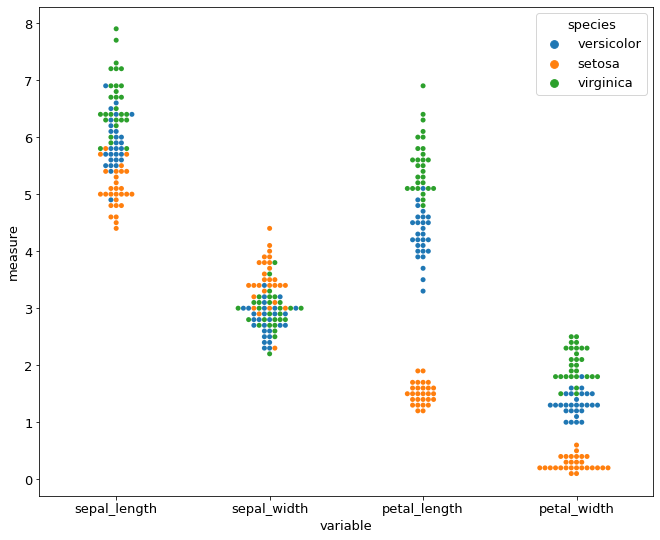

In [36]:
sns.swarmplot(data=train_melt, x='variable',y='measure',hue='species')

- **My takeaways are:**
    - **there is a pretty good identifier: petal_length and petal_width**
    - **sepal measurement would not be the best variable to identify the species of this plant.**
    - **there does not seem to be much difference in sepal_width measurement.**

3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

In [88]:
train = train.assign(sepal_area = (train.sepal_length * train.sepal_width), petal_area = (train.petal_length * train.petal_width))

In [89]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,14.82,3.50
36,5.5,3.5,1.3,0.2,setosa,19.25,0.26
133,6.3,2.8,5.1,1.5,virginica,17.64,7.65
95,5.7,3.0,4.2,1.2,versicolor,17.10,5.04
18,5.7,3.8,1.7,0.3,setosa,21.66,0.51


    - sepal_length x sepal_width
    - petal_length x petal_width
    - sepal_area x petal_area
    - sepal_length x petal_length

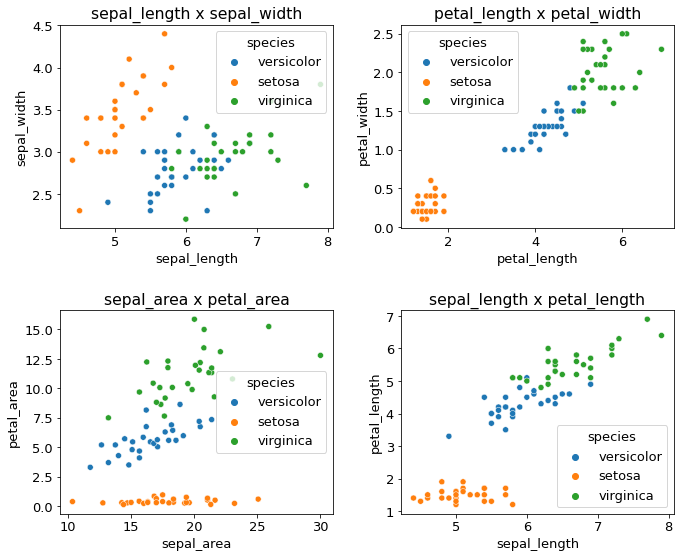

In [90]:
plt.subplot(221)
sns.scatterplot(data=train, x='sepal_length', y='sepal_width', hue='species')
plt.title('sepal_length x sepal_width')

plt.subplot(222)
sns.scatterplot(data=train, x='petal_length', y='petal_width', hue='species')
plt.title('petal_length x petal_width')

plt.subplot(223)
sns.scatterplot(data=train, x='sepal_area', y='petal_area', hue='species')
plt.title('sepal_area x petal_area')

plt.subplot(224)
sns.scatterplot(data=train, x='sepal_length', y='petal_length', hue='species')
plt.title('sepal_length x petal_length')

plt.subplots_adjust(wspace=.25, hspace=.4)

plt.show()

In [ ]:
def scatter_by_species(x, y):
    for species, subset in train.groupby('species'):
    #    print(subset[['sepal_length','sepal_width','species']])
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

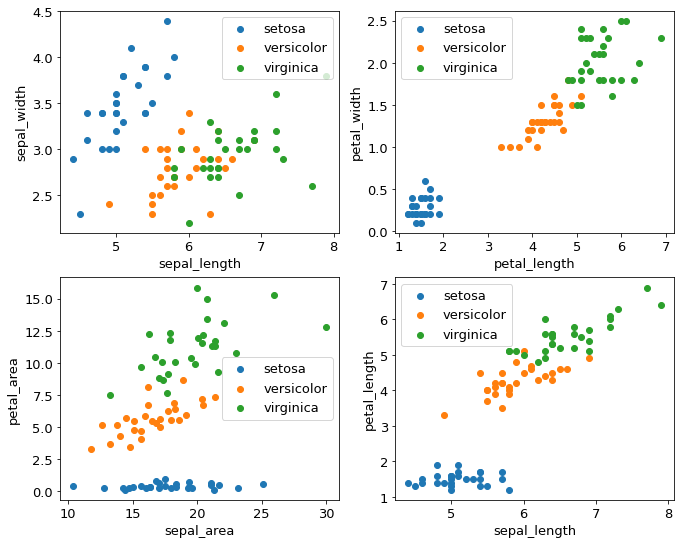

In [100]:
plt.subplot(221)
scatter_by_species('sepal_length','sepal_width')
plt.subplot(222)
scatter_by_species('petal_length','petal_width')
plt.subplot(223)
scatter_by_species('sepal_area','petal_area')
plt.subplot(224)
scatter_by_species('sepal_length','petal_length')

- What are your takeaways?
    - **there is a a linear relationship of petal length and width**
    - **the species are clearly defined by petal dimensions**
    - **the ratio of sepal_length and petal_length is linear and the species are clearly defined**
    

4. Create a heatmap of each variable layering correlation coefficient on top.



In [91]:
train_melt.head()

,species,variable,measure
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


In [104]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,0.299920,0.982404
sepal_area,0.619853,0.673554,0.271618,0.299920,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,0.373870,1.000000


<AxesSubplot:>

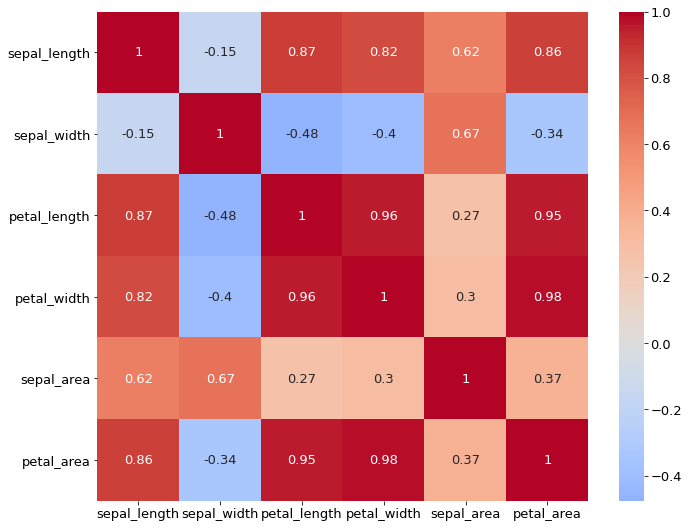

In [103]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', center=0)

5. Create a scatter matrix visualizing the interaction of each variable.



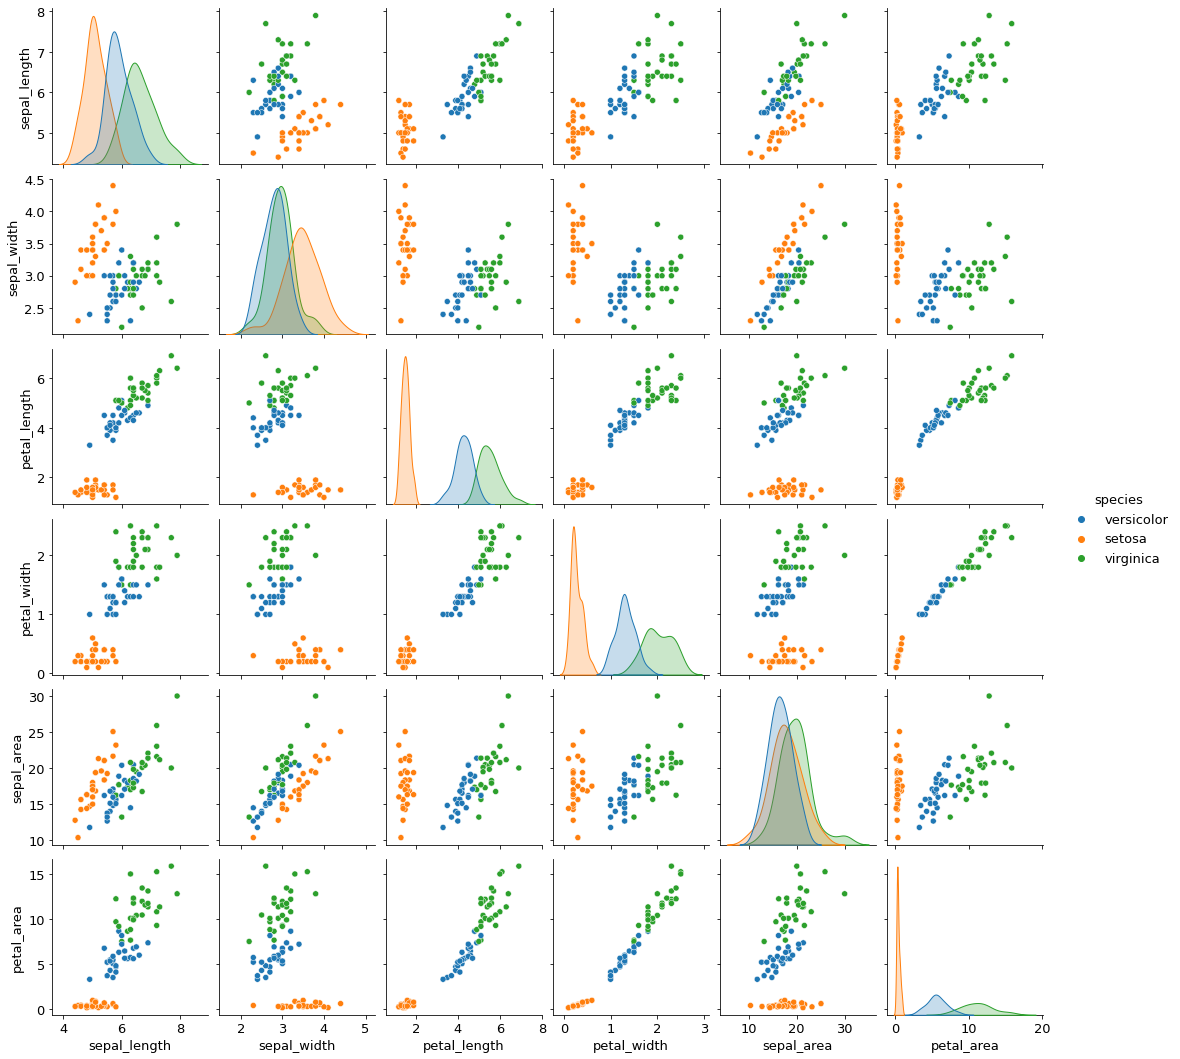

In [43]:

sns.pairplot(data=train_with_areas, hue='species')

6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

- Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

    - H0 there is no significant change in the sepal_length
    - Ha there is a significent change in the sepal_length, thus we reject the null hypothesis

In [44]:
confid_level = .95
α = round((1 - confid_level), 2)

In [45]:
train.groupby('species').sepal_length.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,28.0,5.089286,0.360390,4.4,4.875,5.00,5.400,5.8
versicolor,28.0,5.896429,0.425556,4.9,5.600,5.80,6.125,6.9
virginica,28.0,6.625000,0.532378,5.8,6.300,6.45,6.900,7.9


In [47]:
mean1 = 6.625000
sd1 = 0.532378
nobs1 = 28
mean2 = 5.896429
sd2 = 0.425556
nobs2 = 28

In [48]:
t, p = stats.ttest_ind_from_stats(mean1,sd1,nobs1,mean2,sd2,nobs2)
t, p

(5.656485832114149, 6.024391379564939e-07)

In [49]:
if p < α: 
    print(f'Our p-value:{p} is less than the aplha :{α} \nTherefore, we reject the null hypothesis: \n.  - there is a significant change in sepal length between the species versicolor and virginica')
else:
    print("We failed to reject the null hypothesis.")

Our p-value:6.024391379564939e-07 is less than the aplha :0.05 
Therefore, we reject the null hypothesis: 
.  - there is a significant change in sepal length between the species versicolor and virginica


- What is your takeaway from this statistical testing?
    - **That there is a significant difference in the average sepal legnth in the species versicolor and virginica.**
    - **Based on the t-score virginica is larger and could be looked into.**

7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

- H0: The sepal length of the virginica species is less than or equal to the sepal length of the versicolor species.
- Ha: The sepal length of the virginica species is larger then the sepal length of the versicolor species.

In [50]:
confid_level = .95
α = round((1 - confid_level), 2)

In [51]:
t, p = stats.ttest_ind_from_stats(mean1,sd1,nobs1,mean2,sd2,nobs2)
t, p

(5.656485832114149, 6.024391379564939e-07)

In [66]:
if (p/2) < α and t > 0: 
    print(f'Our p-value: {p} is less than the aplha : {α} and the t-score: {t} is greater than 0. \nWe can reject the null hypothesis: \n.  - The sepal length of the virginica species is significantly larger than the species versicolor')
else:
    print("We failed to reject the null hypothesis.")

Our p-value: 6.024391379564939e-07 is less than the aplha : 0.05 and the t-score: 5.656485832114149 is greater than 0. 
We can reject the null hypothesis: 
.  - The sepal length of the virginica species is significantly larger than the species versicolor


<AxesSubplot:xlabel='sepal_length', ylabel='species'>

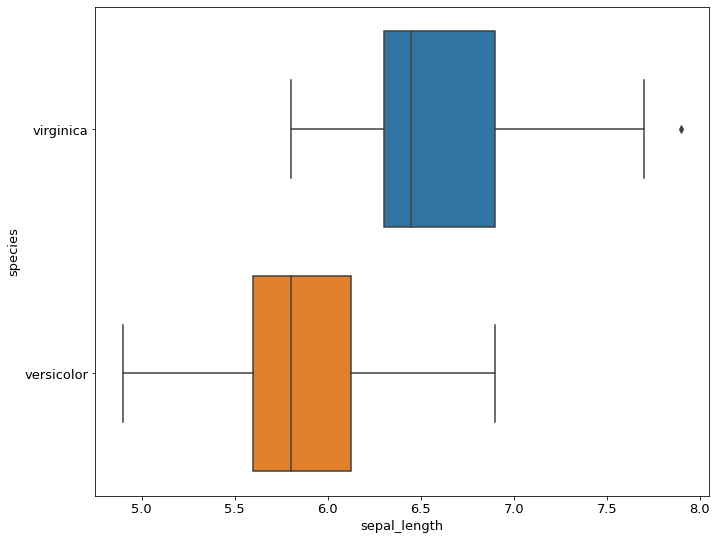

In [53]:
sns.boxplot(data=train, x='sepal_length', y='species', order=['virginica','versicolor'])